In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

check:

1. relation between time and popularity
2. analysis based on price/time
3. ~~try different regression or neural network~~
4. summarize the results and modify the document

In [3]:
data = pd.read_csv("../data/board-game.csv")
high_score = pd.read_csv("../data/high_score.csv")
low_score = pd.read_csv("../data/low_score.csv")

In [4]:
# price = pd.read_csv("../data/price.csv")

In [5]:
data

,Name,Year,min_players,max_players,min_playtime,max_playtime,min_age,category,mechanic,userrated,avg_rate,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight
0,Brian Boru: High King of Ireland,2021,3,5,60,90,14,"['Card Game', 'Medieval', 'Territory Building']","['Area Majority / Influence', 'Closed Drafting...",3003,7.55005,774,4200,76,359,1561,522,93,2.4516
1,Jump Drive,2017,2,4,10,30,13,"['Card Game', 'Science Fiction', 'Space Explor...","['Hand Management', 'Simultaneous Action Selec...",4510,6.99382,1123,6348,229,215,1233,1097,106,2.0189
2,DVONN,2001,2,2,30,30,9,['Abstract Strategy'],"['Grid Movement', 'Map Reduction']",4960,7.45702,591,6917,130,291,1318,1481,386,2.6632
3,Point Salad,2019,2,6,15,30,8,['Card Game'],"['Open Drafting', 'Set Collection']",17480,7.17658,462,29303,300,304,2505,2431,353,1.1530
4,Linko,2014,2,5,20,20,10,['Card Game'],"['Hand Management', 'Move Through Deck', 'Open...",4926,6.99363,1072,7998,167,116,662,1020,240,1.3917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,The Pursuit of Happiness,2015,1,4,60,90,12,['Economic'],"['End Game Bonuses', 'Income', 'Open Drafting'...",5261,7.18274,805,8574,198,297,1762,1081,135,2.5037
1996,First Rat,2022,1,5,30,75,10,"['Adventure', 'Animals', 'Humor', 'Space Explo...","['Point to Point Movement', 'Set Collection', ...",2457,7.64693,875,4190,31,285,1454,383,83,2.2771
1997,Small World of Warcraft,2020,2,5,40,80,8,"['Fantasy', 'Fighting', 'Territory Building', ...","['Area Majority / Influence', 'Area Movement',...",3055,7.34986,1090,8963,131,114,1214,469,64,2.5938
1998,Container,2007,3,5,60,90,12,"['Economic', 'Industry / Manufacturing', 'Naut...","['Auction/Bidding', 'Auction: Sealed Bid', 'Co...",4710,7.15592,892,3204,69,616,1966,1495,386,3.2409


In [6]:
high_score

,Unnamed: 0,score
0,337765,59.347971
1,205597,38.289386
2,2346,53.014469
3,274960,41.117708
4,153065,34.530331
...,...,...
1995,181687,44.305477
1996,347703,64.793856
1997,309630,49.494620
1998,26990,47.041357


In [7]:
high_score.drop("Unnamed: 0", axis = 1, inplace=True)
high_score
low_score.drop("Unnamed: 0", axis = 1, inplace=True)
low_score

,score
0,0.499002
1,1.684024
2,1.225884
3,0.576550
4,1.014405
...,...
1995,1.402312
1996,0.282943
1997,1.304206
1998,3.181336


In [8]:
print(data.info())
print(low_score.info())
print(high_score.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2000 non-null   object 
 1   Year          2000 non-null   int64  
 2   min_players   2000 non-null   int64  
 3   max_players   2000 non-null   int64  
 4   min_playtime  2000 non-null   int64  
 5   max_playtime  2000 non-null   int64  
 6   min_age       2000 non-null   int64  
 7   category      2000 non-null   object 
 8   mechanic      2000 non-null   object 
 9   userrated     2000 non-null   int64  
 10  avg_rate      2000 non-null   float64
 11  rank          2000 non-null   int64  
 12  owned         2000 non-null   int64  
 13  trading       2000 non-null   int64  
 14  wanting       2000 non-null   int64  
 15  wishing       2000 non-null   int64  
 16  num_comments  2000 non-null   int64  
 17  num_weights   2000 non-null   int64  
 18  avg_weight    2000 non-null 

In [9]:
data.drop("avg_rate",axis=1, inplace=True)

In [10]:
high_data = high_score.join(data)
low_data = low_score.join(data)
low_data

,score,Name,Year,min_players,max_players,min_playtime,max_playtime,min_age,category,mechanic,userrated,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight
0,0.499002,Brian Boru: High King of Ireland,2021,3,5,60,90,14,"['Card Game', 'Medieval', 'Territory Building']","['Area Majority / Influence', 'Closed Drafting...",3003,774,4200,76,359,1561,522,93,2.4516
1,1.684024,Jump Drive,2017,2,4,10,30,13,"['Card Game', 'Science Fiction', 'Space Explor...","['Hand Management', 'Simultaneous Action Selec...",4510,1123,6348,229,215,1233,1097,106,2.0189
2,1.225884,DVONN,2001,2,2,30,30,9,['Abstract Strategy'],"['Grid Movement', 'Map Reduction']",4960,591,6917,130,291,1318,1481,386,2.6632
3,0.576550,Point Salad,2019,2,6,15,30,8,['Card Game'],"['Open Drafting', 'Set Collection']",17480,462,29303,300,304,2505,2431,353,1.1530
4,1.014405,Linko,2014,2,5,20,20,10,['Card Game'],"['Hand Management', 'Move Through Deck', 'Open...",4926,1072,7998,167,116,662,1020,240,1.3917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.402312,The Pursuit of Happiness,2015,1,4,60,90,12,['Economic'],"['End Game Bonuses', 'Income', 'Open Drafting'...",5261,805,8574,198,297,1762,1081,135,2.5037
1996,0.282943,First Rat,2022,1,5,30,75,10,"['Adventure', 'Animals', 'Humor', 'Space Explo...","['Point to Point Movement', 'Set Collection', ...",2457,875,4190,31,285,1454,383,83,2.2771
1997,1.304206,Small World of Warcraft,2020,2,5,40,80,8,"['Fantasy', 'Fighting', 'Territory Building', ...","['Area Majority / Influence', 'Area Movement',...",3055,1090,8963,131,114,1214,469,64,2.5938
1998,3.181336,Container,2007,3,5,60,90,12,"['Economic', 'Industry / Manufacturing', 'Naut...","['Auction/Bidding', 'Auction: Sealed Bid', 'Co...",4710,892,3204,69,616,1966,1495,386,3.2409


C:\Users\fsd_n\AppData\Local\Temp\ipykernel_19352\2529152211.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(high_data.corr(), vmin = -1, vmax=1,annot=True, lw=.5, cmap=cmap,linecolor='white')


<Axes: >

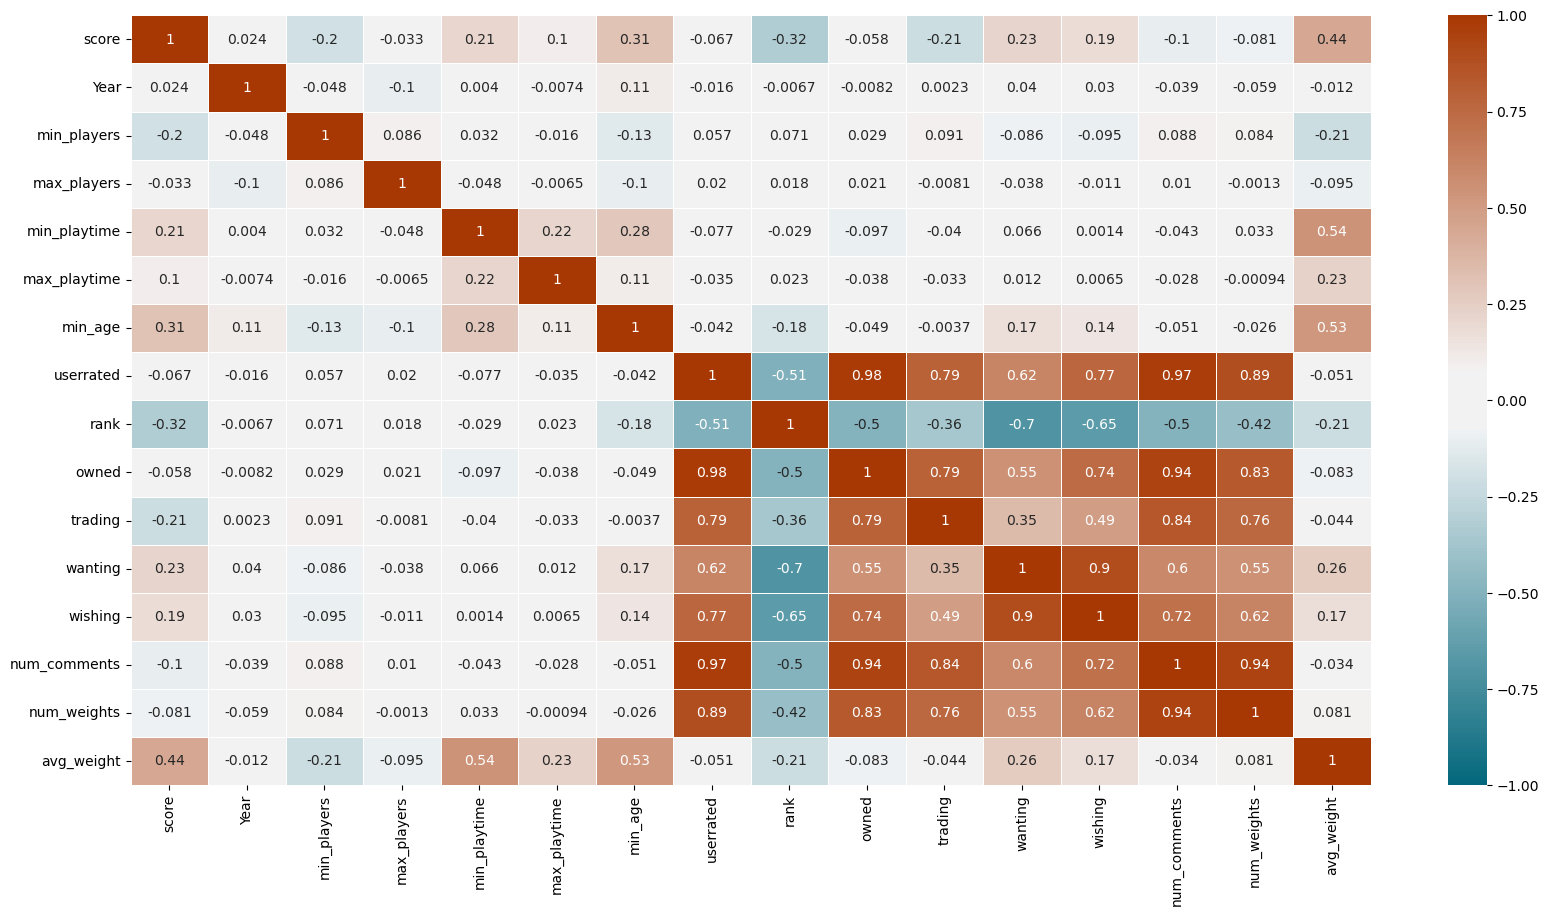

In [38]:
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(220, 20, l=40, s=99, sep=20, center='light', as_cmap=True)
sns.heatmap(high_data.corr(), vmin = -1, vmax=1,annot=True, lw=.5, cmap=cmap,linecolor='white')

C:\Users\fsd_n\AppData\Local\Temp\ipykernel_19352\4052444507.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(low_data.corr(), vmin = -1, vmax=1,annot=True, lw=.5, cmap=cmap,linecolor='white')


<Axes: >

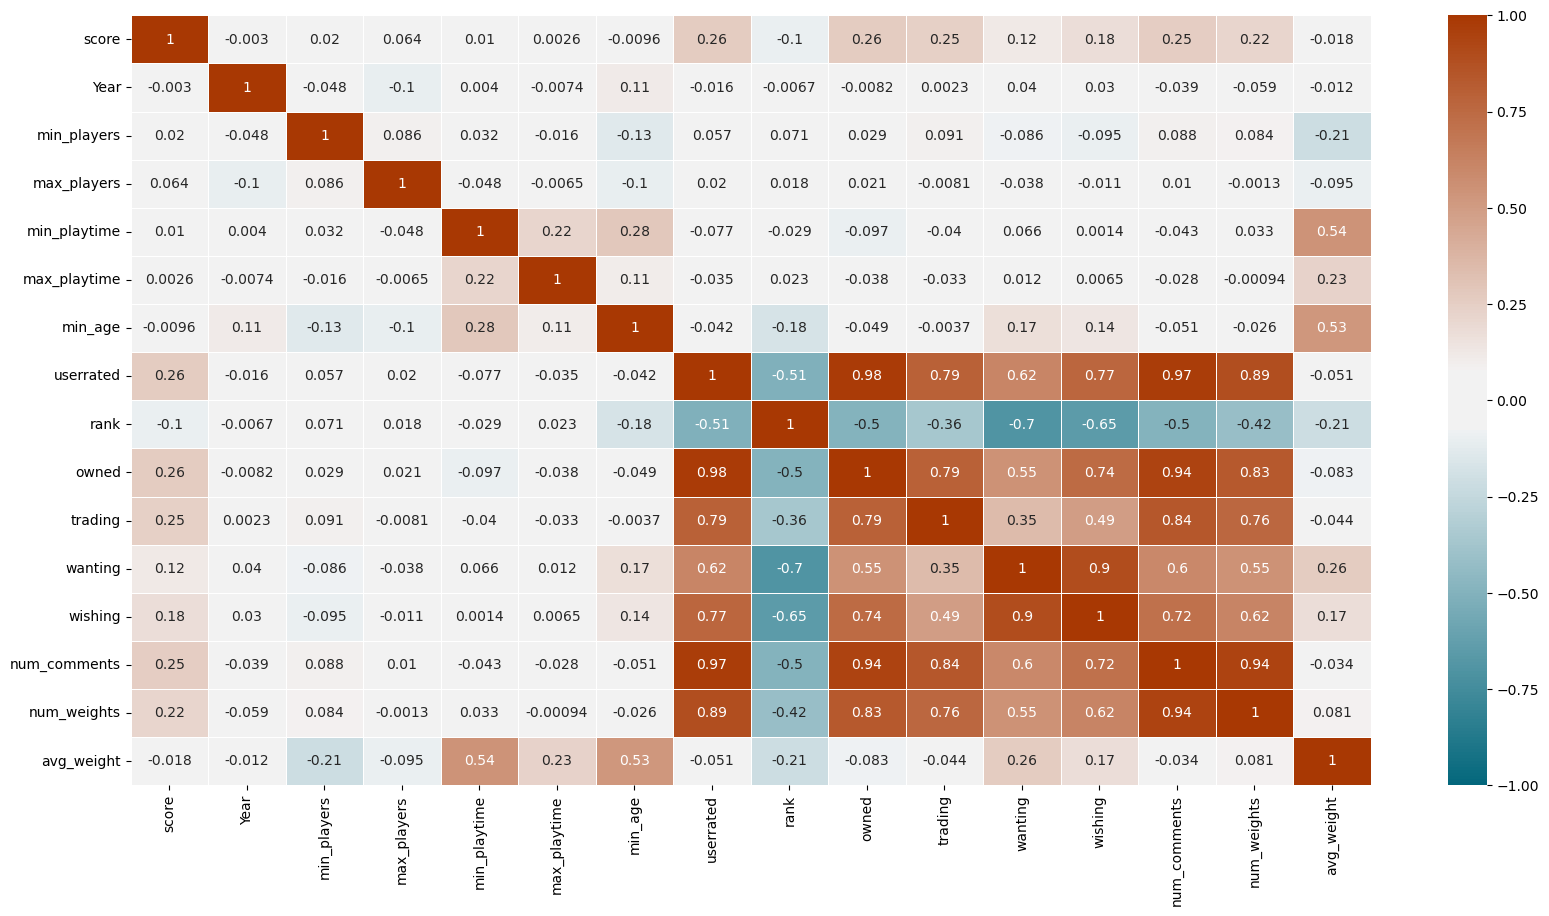

In [39]:
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(220, 20, l=40, s=99, sep=20, center='light', as_cmap=True)
sns.heatmap(low_data.corr(), vmin = -1, vmax=1,annot=True, lw=.5, cmap=cmap,linecolor='white')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn.ensemble import RandomForestRegressor as RandForest
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
x = high_data.drop(['score','Name', 'category', 'mechanic'],axis=1)
y = high_data.score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [15]:
x_train

,Year,min_players,max_players,min_playtime,max_playtime,min_age,userrated,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight
1236,2016,2,4,15,30,6,2224,1929,6733,147,63,394,618,43,1.4186
1610,2011,2,4,75,75,10,2035,1495,1839,101,271,956,726,154,2.3506
1930,2007,3,5,20,20,8,4958,1785,5831,194,100,502,1313,472,1.3962
706,2005,2,5,60,60,12,14021,249,15179,272,1305,4329,3753,917,2.9258
1103,2002,3,5,150,150,12,3612,756,2960,128,257,842,1315,461,3.3080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2009,2,4,90,90,12,5422,569,4412,92,360,1204,1145,384,2.8359
1994,2017,1,5,60,90,14,2785,1572,6740,219,89,830,730,45,2.2444
51,2023,1,5,30,150,14,2721,597,5982,39,315,2169,610,159,2.9245
1275,2019,2,5,30,45,8,3080,1107,5272,80,262,1446,520,55,1.0909


In [16]:
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

las_coeff_tot = pd.Series(las.coef_[0], index = x.columns)
print(las_coeff_tot)

Mean Squared Error: 190.31509154000193
Root Mean Squared Error: 13.795473588826225
Mean Absolute Error: 8.964706218264062
Year           -0.00218
min_players    -0.00218
max_players    -0.00218
min_playtime   -0.00218
max_playtime   -0.00218
min_age        -0.00218
userrated      -0.00218
rank           -0.00218
owned          -0.00218
trading        -0.00218
wanting        -0.00218
wishing        -0.00218
num_comments   -0.00218
num_weights    -0.00218
avg_weight     -0.00218
dtype: float64


In [17]:
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

rid_coeff_tot = pd.Series(rid.coef_[0], index = x.columns)
print(rid_coeff_tot)

Mean Squared Error: 186.18753343718242
Root Mean Squared Error: 13.645055274244308
Mean Absolute Error: 8.869035656146266
Year           -0.002253
min_players    -0.002253
max_players    -0.002253
min_playtime   -0.002253
max_playtime   -0.002253
min_age        -0.002253
userrated      -0.002253
rank           -0.002253
owned          -0.002253
trading        -0.002253
wanting        -0.002253
wishing        -0.002253
num_comments   -0.002253
num_weights    -0.002253
avg_weight     -0.002253
dtype: float64


In [18]:
tree = DTree(max_depth=5)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

feature_importance = pd.Series(tree.feature_importances_, index = x.columns)
print(feature_importance)


Mean Squared Error: 250.72590605322165
Root Mean Squared Error: 15.834326826651699
Mean Absolute Error: 9.996645196972798
Year            0.020295
min_players     0.000000
max_players     0.037490
min_playtime    0.000000
max_playtime    0.004330
min_age         0.000000
userrated       0.141190
rank            0.279112
owned           0.000000
trading         0.136129
wanting         0.017966
wishing         0.000000
num_comments    0.109732
num_weights     0.002778
avg_weight      0.250979
dtype: float64


In [19]:
fore = RandForest(n_estimators=100)
fore.fit(x_train, y_train)
y_pred = fore.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

feature_importance = pd.Series(fore.feature_importances_, index = x.columns)
print(feature_importance)

Mean Squared Error: 152.4499276655531
Root Mean Squared Error: 12.347061499221306
Mean Absolute Error: 6.5631707111221615
Year            0.071525
min_players     0.007739
max_players     0.023672
min_playtime    0.013501
max_playtime    0.017987
min_age         0.017287
userrated       0.092856
rank            0.218691
owned           0.038001
trading         0.126192
wanting         0.045068
wishing         0.033356
num_comments    0.060211
num_weights     0.035034
avg_weight      0.198880
dtype: float64


In [20]:
x = low_data.drop(['score','Name', 'category', 'mechanic'],axis=1)
y = low_data.score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [21]:
x_train

,Year,min_players,max_players,min_playtime,max_playtime,min_age,userrated,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight
1468,2014,2,2,60,60,14,3816,1059,8063,402,39,233,703,114,2.3684
1804,2015,3,8,15,30,12,3920,1479,7250,101,46,595,574,80,1.0625
232,2017,2,4,60,90,14,3046,430,5856,120,197,1292,844,123,3.0325
1792,1986,3,5,180,300,12,4235,975,6039,258,132,713,1546,536,3.1604
1574,2020,1,6,5,30,8,1656,1939,4367,61,97,841,362,38,1.1579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,2020,2,4,30,30,10,9300,220,18241,180,397,4280,1438,195,1.9897
815,1977,2,6,90,90,12,3960,1403,4428,193,116,474,1679,429,2.3706
739,2020,2,5,45,45,14,1930,1642,2305,38,201,1324,432,67,2.1343
1443,2021,1,4,60,120,10,1893,1354,3479,52,219,1515,390,84,2.7024


In [22]:
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

las_coeff_tot = pd.Series(las.coef_[0], index = x.columns)
print(las_coeff_tot)

Mean Squared Error: 93.72918783158941
Root Mean Squared Error: 9.681383570109668
Mean Absolute Error: 2.6179523598023993
Year           -0.000136
min_players    -0.000136
max_players    -0.000136
min_playtime   -0.000136
max_playtime   -0.000136
min_age        -0.000136
userrated      -0.000136
rank           -0.000136
owned          -0.000136
trading        -0.000136
wanting        -0.000136
wishing        -0.000136
num_comments   -0.000136
num_weights    -0.000136
avg_weight     -0.000136
dtype: float64


In [23]:
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

rid_coeff_tot = pd.Series(rid.coef_[0], index = x.columns)
print(rid_coeff_tot)

Mean Squared Error: 93.8961954164924
Root Mean Squared Error: 9.69000492345037
Mean Absolute Error: 2.6476906584723348
Year           -0.000079
min_players    -0.000079
max_players    -0.000079
min_playtime   -0.000079
max_playtime   -0.000079
min_age        -0.000079
userrated      -0.000079
rank           -0.000079
owned          -0.000079
trading        -0.000079
wanting        -0.000079
wishing        -0.000079
num_comments   -0.000079
num_weights    -0.000079
avg_weight     -0.000079
dtype: float64


In [24]:
tree = DTree(max_depth=5)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

feature_importance = pd.Series(tree.feature_importances_, index = x.columns)
print(feature_importance)


Mean Squared Error: 214.5118309376497
Root Mean Squared Error: 14.646222411859302
Mean Absolute Error: 3.6138549818977723
Year            0.001194
min_players     0.001591
max_players     0.000000
min_playtime    0.000000
max_playtime    0.027574
min_age         0.000019
userrated       0.000000
rank            0.000000
owned           0.299293
trading         0.285109
wanting         0.168021
wishing         0.000000
num_comments    0.000127
num_weights     0.013560
avg_weight      0.203512
dtype: float64


In [25]:
fore = RandForest(n_estimators=100)
fore.fit(x_train, y_train)
y_pred = fore.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

feature_importance = pd.Series(fore.feature_importances_, index = x.columns)
print(feature_importance)

Mean Squared Error: 104.75583702357035
Root Mean Squared Error: 10.235029898518633
Mean Absolute Error: 2.790344779821044
Year            0.050676
min_players     0.013731
max_players     0.014008
min_playtime    0.027599
max_playtime    0.019869
min_age         0.033230
userrated       0.091069
rank            0.085200
owned           0.095410
trading         0.193105
wanting         0.064665
wishing         0.042714
num_comments    0.104889
num_weights     0.090266
avg_weight      0.073569
dtype: float64


In [26]:
x_high = high_data.drop(['score','Name', 'category', 'mechanic'],axis=1).values
y_high = high_data['score']

x_low = low_data.drop(['score','Name', 'category', 'mechanic'],axis=1).values
y_low = low_data['score']

In [37]:
from sklearn.manifold import TSNE

model = TSNE()
tsne_features = model.fit_transform(x_high)
x_high_tsne = tsne_features[:,0]
y_high_tsne = tsne_features[:,1]

x_high['x'] = x_high_tsne
x_high['y'] = y_high_tsne

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

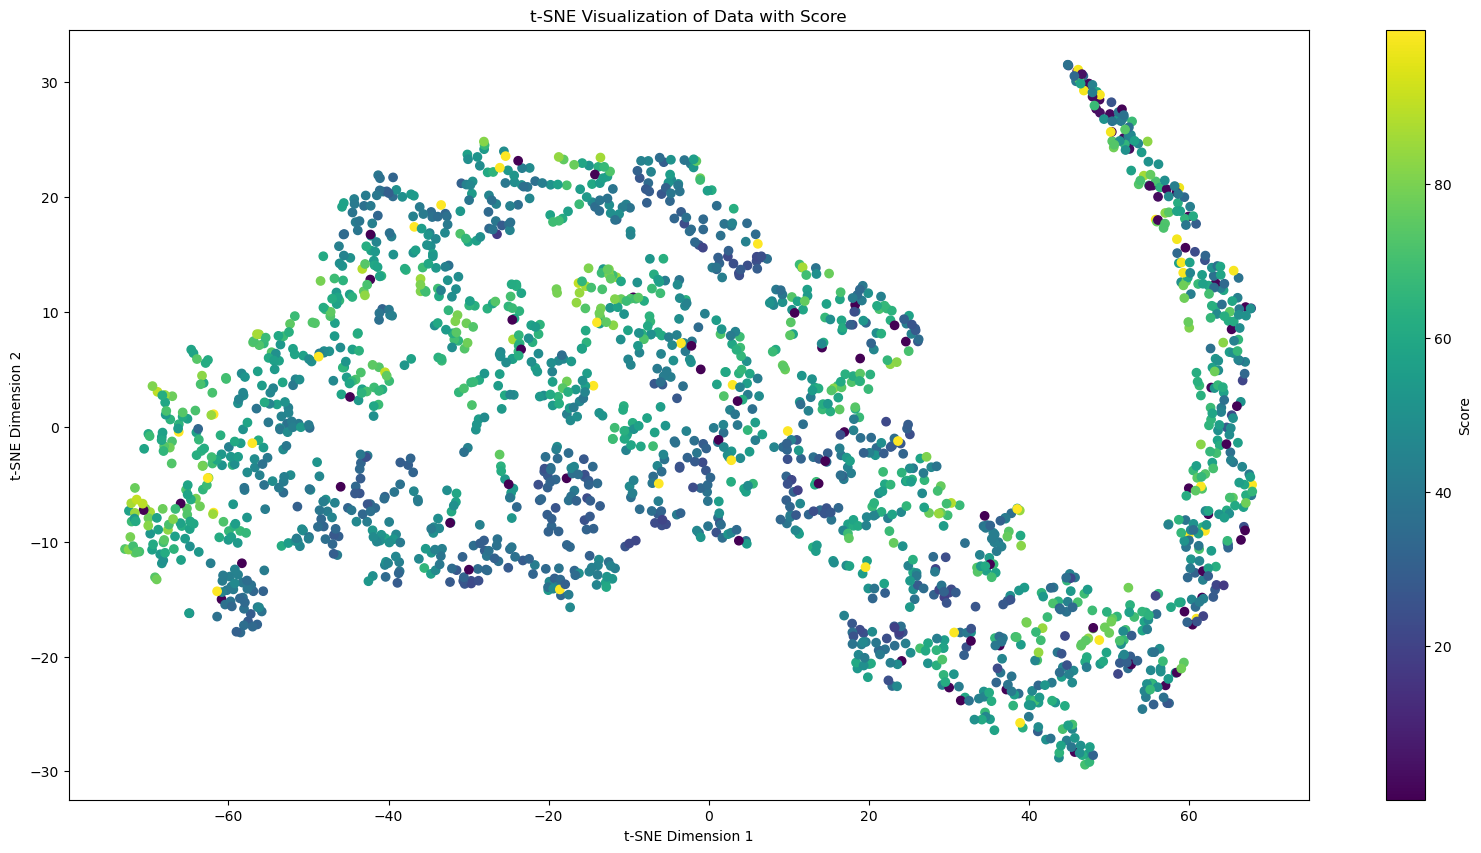

In [ ]:


plt.figure(figsize=(20,10))
plt.scatter(x_high_tsne, y_high_tsne, c=y_high)
plt.colorbar(label='Score')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Data with Score')
plt.show()



In [28]:
categories = data.category
mechanics = data.mechanic
mechanics.iloc[0]

"['Area Majority / Influence', 'Closed Drafting', 'Hand Management', 'Trick-taking']"